### Using Pyspark 1.6 in Jupyter Notebook

This is an introductory notebook for a beginners usage in Pyspark via Jupyter. It covers the basic functionalities of Pyspark from how to read/write tables, to aggregation functions on dataframes and also the MLlib. I've read that the 2.0 version of Pyspark is quite different from 1.6 and there are more functions in 2.0 so once again I have to mention that the following codes are compatible with 1.6. Also, do check out the last part in the notebook if you've yet to set up Spark for more details.

In [23]:
#import necessary packages and start spark and hive contexts
from pyspark.context import SparkContext
from pyspark.sql import HiveContext
sqlContext = HiveContext(sc)

import pandas as pd

In [25]:
#using pandas to read existing csv files in local directory
sales = pd.read_csv('Lynda Datasets/cogsley_sales.csv')

In [ ]:
#save to hive 
#only neeeded if it does not exist in hive
sales_spark.write.saveAsTable('cogsley_sales')

#if exist, read using
sqlContext.sql('select * from cogsley_sales')

In [26]:
#creating spark dataframe
sales_spark = sqlContext.createDataFrame(sales)

In [27]:
#show first few rows of data in sales_spark
sales_spark.show()

+-----+-------+----------+--------------+--------+-----+-----------+----+----------+------------------+--------------------+--------------------+--------------------+---------------+-------+--------------+-------+-------------------+--------------+--------------------+---------------+------------------+----------------+--------------+----------+--------+----------+
|RowID|OrderID| OrderDate|OrderMonthYear|Quantity|Quote|DiscountPct|Rate|SaleAmount|      CustomerName|         CompanyName|              Sector|            Industry|           City|ZipCode|         State| Region|ProjectCompleteDate|DaystoComplete|          ProductKey|ProductCategory|ProductSubCategory|      Consultant|       Manager|HourlyWage|RowCount|WageMargin|
+-----+-------+----------+--------------+--------+-----+-----------+----+----------+------------------+--------------------+--------------------+--------------------+---------------+-------+--------------+-------+-------------------+--------------+----------------

In [30]:
#schema of table for structured data and corresponding data type
sales_spark.printSchema()

root
 |-- RowID: long (nullable = true)
 |-- OrderID: long (nullable = true)
 |-- OrderDate: string (nullable = true)
 |-- OrderMonthYear: string (nullable = true)
 |-- Quantity: long (nullable = true)
 |-- Quote: long (nullable = true)
 |-- DiscountPct: double (nullable = true)
 |-- Rate: long (nullable = true)
 |-- SaleAmount: double (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- CompanyName: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- City: string (nullable = true)
 |-- ZipCode: long (nullable = true)
 |-- State: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- ProjectCompleteDate: string (nullable = true)
 |-- DaystoComplete: long (nullable = true)
 |-- ProductKey: string (nullable = true)
 |-- ProductCategory: string (nullable = true)
 |-- ProductSubCategory: string (nullable = true)
 |-- Consultant: string (nullable = true)
 |-- Manager: string (nullable = true)
 |-- HourlyWage:

### EDA & Getting to know some basic Pyspark 1.6 commands
#### Some extra functions similar to SQL and Pandas Aggregation

In [33]:
#remove duplicates from column and sort
sales_spark.select('State').distinct().orderBy('State').show()

+-----------+
|      State|
+-----------+
|    Alabama|
|    Arizona|
|   Arkansas|
| California|
|   Colorado|
|Connecticut|
|   Delaware|
|    Florida|
|    Georgia|
|      Idaho|
|   Illinois|
|    Indiana|
|       Iowa|
|     Kansas|
|   Kentucky|
|  Louisiana|
|         MA|
|         MO|
|      Maine|
|   Maryland|
+-----------+
only showing top 20 rows



In [43]:
#calculate sale total by state
sales_spark.select(sales_spark['State'],sales_spark['SaleAmount']).groupBy('State').sum().orderBy('sum(SaleAmount)', ascending=False).show()

+--------------+------------------+
|         State|   sum(SaleAmount)|
+--------------+------------------+
|    California|2628823.5999999996|
|         Texas|         2037062.8|
|      Illinois|         1699669.5|
|       Florida|        1653073.85|
|          Ohio|1355199.6500000004|
|      New York|         1243889.2|
|      Michigan|          978653.8|
|       Indiana| 876724.2999999998|
|     Minnesota|          829628.5|
|    Washington|          763403.2|
|  Pennsylvania|          758402.6|
|North Carolina| 742337.4500000001|
|      Virginia| 709548.8999999999|
|      Maryland| 653470.4500000002|
|       Georgia| 639458.7000000001|
|      Colorado|          614703.5|
|     Wisconsin|          611186.8|
|     Tennessee|          577464.1|
|        Oregon|         574299.95|
|          Iowa| 568995.7499999999|
+--------------+------------------+
only showing top 20 rows



In [44]:
#filtering a spark dataframe
sales_spark.filter(sales_spark['State']=='New York').show()

+-----+-------+----------+--------------+--------+-----+-----------+----+----------+-------------------+--------------------+--------------------+--------------------+---------------+-------+--------+------+-------------------+--------------+--------------------+---------------+------------------+----------------+-----------+----------+--------+----------+
|RowID|OrderID| OrderDate|OrderMonthYear|Quantity|Quote|DiscountPct|Rate|SaleAmount|       CustomerName|         CompanyName|              Sector|            Industry|           City|ZipCode|   State|Region|ProjectCompleteDate|DaystoComplete|          ProductKey|ProductCategory|ProductSubCategory|      Consultant|    Manager|HourlyWage|RowCount|WageMargin|
+-----+-------+----------+--------------+--------+-----+-----------+----+----------+-------------------+--------------------+--------------------+--------------------+---------------+-------+--------+------+-------------------+--------------+--------------------+---------------+---

### Joining tables
#### a. Join sales and client info, we want to know the total sales per company in the IPO year

In [64]:
#using pandas to read existing csv files in local directory
client = pd.read_csv('Lynda Datasets/cogsley_clients.csv')

In [65]:
#create spark dataframe similar to one above
client_spark = sqlContext.createDataFrame(client)

In [66]:
client_spark.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- LastSale: string (nullable = true)
 |-- MarketCapLabel: string (nullable = true)
 |-- MarketCapAmount: string (nullable = true)
 |-- IPOyear: string (nullable = true)
 |-- Sector: string (nullable = true)
 |-- industry: string (nullable = true)
 |-- Summary Quote: string (nullable = true)



SQL Equivalent
``` SQL
SELECT CompanyName, IPOYear, Symbol, round(sum(SaleAmount)) as Sales
FROM cogsley_sales
LEFT JOIN cogsley_clients 
ON CompanyName = Name
GROUP BY CompanyName, IPOYear, Symbol
ORDER BY 1
```

Trying out using Spark DF, might not be the most efficient, happy to get some feedback.

In [68]:
#renaming column names
client_spark = client_spark.withColumnRenamed(existing='Name',new='CompanyName')

#left join both sales_spark and client_spark table
client_sales = sales_spark.join(client_spark, how='left', on='CompanyName')

In [83]:
#select for relevant columns and sum(SaleAmount) by companyName
(client_sales
.select('CompanyName','IPOYear','Symbol','SaleAmount')
.groupBy('CompanyName','IPOYear','Symbol').sum()
.orderBy('CompanyName')
.show())

+--------------------+-------+------+------------------+
|         CompanyName|IPOYear|Symbol|   sum(SaleAmount)|
+--------------------+-------+------+------------------+
|Activision Blizza...|    n/a|  ATVI|         319225.95|
|Adobe Systems Inc...|   1986|  ADBE|          266103.3|
|Akamai Technologi...|   1999|  AKAM|203202.69999999998|
|Alexion Pharmaceu...|   1996|  ALXN|237227.59999999998|
|  Altera Corporation|   1988|  ALTR|         181035.35|
|    Amazon.com, Inc.|   1997|  AMZN|         260095.35|
|American Airlines...|    n/a|   AAL|          292181.7|
|          Amgen Inc.|   1983|  AMGN|292386.79999999993|
|Analog Devices, Inc.|    n/a|   ADI|          353513.3|
|          Apple Inc.|   1980|  AAPL|240962.29999999996|
|Applied Materials...|   1972|  AMAT|         289714.75|
|      Autodesk, Inc.|    n/a|  ADSK|203777.40000000002|
|Automatic Data Pr...|    n/a|   ADP|332082.74999999994|
|Avago Technologie...|   2009|  AVGO|267124.44999999995|
|         Baidu, Inc.|   2005| 

#### b. Another join
This time we join the state_info table to sales_spark. We want to know the sales amount for each state

In [85]:
#using pandas to read existing csv files in local directory
state = pd.read_csv('Lynda Datasets/state_info.csv')
state_spark = sqlContext.createDataFrame(state)

SQL Equivalent
``` SQL
SELECT i.StateCode, round(sum(s.SaleAmount) as Sales
FROM cogsley_sales s
JOIN state_info i 
ON s.State = i.State
GROUP BY i.StateCode
```

In [88]:
# Pyspark equivalent
(sales_spark
 .join(state_spark, on='State')
 .select('StateCode','SaleAmount')
 .groupBy('StateCode').sum()).show()

+---------+------------------+
|StateCode|   sum(SaleAmount)|
+---------+------------------+
|       MS|         281995.75|
|       MT|183637.19999999998|
|       TN| 577464.0999999999|
|       NC| 742337.4499999998|
|       ND|106606.84999999999|
|       NE|259548.49999999997|
|       NH|         186445.95|
|       AL| 439714.3500000001|
|       TX|2037062.8000000003|
|       NJ|          564572.8|
|       NM| 324261.4000000001|
|       AR|          439496.7|
|       NV|          188015.1|
|       AZ|          486961.0|
|       NY|1243889.1999999995|
|       UT|          496737.3|
|       OH|1355199.6500000006|
|       OK| 329648.9000000001|
|       IA| 568995.7500000001|
|       VA| 709548.9000000001|
+---------+------------------+
only showing top 20 rows



### MLLib

In [89]:
from pyspark.mllib.regression import LabeledPoint

In [90]:
#get monthly sales data
summary = (sales_spark.select('OrderMonthYear','SaleAmount')
           .groupBy('OrderMonthYear').sum()
           .orderBy('OrderMonthYear')
           .toDF('OrderMonthYear','SaleAmount'))
summary.show()

+--------------+-----------------+
|OrderMonthYear|       SaleAmount|
+--------------+-----------------+
|    2009-01-01|         741024.2|
|    2009-02-01|544241.1499999999|
|    2009-03-01|563502.1500000001|
|    2009-04-01|619011.3999999999|
|    2009-05-01|         641158.7|
|    2009-06-01|        558288.55|
|    2009-07-01|673657.0999999999|
|    2009-08-01|662651.8499999999|
|    2009-09-01|        650729.35|
|    2009-10-01|        571600.35|
|    2009-11-01|566817.6499999999|
|    2009-12-01|        560466.65|
|    2010-01-01|577707.6000000001|
|    2010-02-01|         585992.3|
|    2010-03-01|         528872.8|
|    2010-04-01|        489686.85|
|    2010-05-01|        745586.95|
|    2010-06-01|609012.2000000001|
|    2010-07-01|        581447.45|
|    2010-08-01|         619167.0|
+--------------+-----------------+
only showing top 20 rows



In [91]:
#convert OrderMonthYear to integer type
results = (summary.map(lambda r: (int(r.OrderMonthYear.replace('-','')),r.SaleAmount))
           .toDF(['OrderMonthYear','SaleAmount']))
results.show()

+--------------+-----------------+
|OrderMonthYear|       SaleAmount|
+--------------+-----------------+
|      20090101|         741024.2|
|      20090201|544241.1499999999|
|      20090301|563502.1500000001|
|      20090401|619011.3999999999|
|      20090501|         641158.7|
|      20090601|        558288.55|
|      20090701|673657.0999999999|
|      20090801|662651.8499999999|
|      20090901|        650729.35|
|      20091001|        571600.35|
|      20091101|566817.6499999999|
|      20091201|        560466.65|
|      20100101|577707.6000000001|
|      20100201|         585992.3|
|      20100301|         528872.8|
|      20100401|        489686.85|
|      20100501|        745586.95|
|      20100601|609012.2000000001|
|      20100701|        581447.45|
|      20100801|         619167.0|
+--------------+-----------------+
only showing top 20 rows



for more info about LabeledPoint, refer to https://spark.apache.org/docs/2.2.1/api/java/org/apache/spark/ml/feature/LabeledPoint.html

In [94]:
#convert dataframe to features and labels
data = (results.select('OrderMonthYear','SaleAmount')
        .map(lambda r: LabeledPoint(r[1],[r[0]]))
        .toDF())
data.show()

+-------------+-----------------+
|     features|            label|
+-------------+-----------------+
|[2.0090101E7]|         741024.2|
|[2.0090201E7]|544241.1499999999|
|[2.0090301E7]|563502.1500000001|
|[2.0090401E7]|619011.3999999999|
|[2.0090501E7]|         641158.7|
|[2.0090601E7]|        558288.55|
|[2.0090701E7]|673657.0999999999|
|[2.0090801E7]|662651.8499999999|
|[2.0090901E7]|        650729.35|
|[2.0091001E7]|        571600.35|
|[2.0091101E7]|566817.6499999999|
|[2.0091201E7]|        560466.65|
|[2.0100101E7]|577707.6000000001|
|[2.0100201E7]|         585992.3|
|[2.0100301E7]|         528872.8|
|[2.0100401E7]|        489686.85|
|[2.0100501E7]|        745586.95|
|[2.0100601E7]|609012.2000000001|
|[2.0100701E7]|        581447.45|
|[2.0100801E7]|         619167.0|
+-------------+-----------------+
only showing top 20 rows



#### Building Linear Regression Model

In [95]:
#import
from pyspark.ml.regression import LinearRegression
lr=LinearRegression()

#fit 2 regression models
lr_1 = lr.fit(data, {lr.regParam:0.0})
lr_2 = lr.fit(data, {lr.regParam:100.0})

#predict on the data
predict_1 = lr_1.transform(data)
predict_2 = lr_2.transform(data)

/opt/cloudera/parcels/CDH-5.9.0-1.cdh5.9.0.p0.23/lib/spark/python/pyspark/ml/regression.py:123: UserWarning: weights is deprecated. Use coefficients instead.
  warnings.warn("weights is deprecated. Use coefficients instead.")


In [96]:
predict_1.show()

+-------------+-----------------+-----------------+
|     features|            label|       prediction|
+-------------+-----------------+-----------------+
|[2.0090101E7]|         741024.2|607367.4184938967|
|[2.0090201E7]|544241.1499999999|607347.2708133357|
|[2.0090301E7]|563502.1500000001|607327.1231327746|
|[2.0090401E7]|619011.3999999999|607306.9754522135|
|[2.0090501E7]|         641158.7|607286.8277716525|
|[2.0090601E7]|        558288.55|607266.6800910919|
|[2.0090701E7]|673657.0999999999|607246.5324105308|
|[2.0090801E7]|662651.8499999999|607226.3847299698|
|[2.0090901E7]|        650729.35|607206.2370494087|
|[2.0091001E7]|        571600.35|607186.0893688477|
|[2.0091101E7]|566817.6499999999|607165.9416882871|
|[2.0091201E7]|        560466.65| 607145.794007726|
|[2.0100101E7]|577707.6000000001|605352.6504378002|
|[2.0100201E7]|         585992.3|605332.5027572396|
|[2.0100301E7]|         528872.8|605312.3550766786|
|[2.0100401E7]|        489686.85|605292.2073961175|
|[2.0100501E

In [99]:
#evaluating the lr model
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName = 'rmse')
RMSE1 = evaluator.evaluate(predict_1)
print('Model 1: Root Mean Squared Error = ' + str(RMSE1))

RMSE2 = evaluator.evaluate(predict_2)
print('Model 2: Root Mean Squared Error = ' + str(RMSE2))

print('Both models are about the same in accuracy')

Model 1: Root Mean Squared Error = 69171.4670091
Model 2: Root Mean Squared Error = 69171.4670855
Both models are about the same in accuracy


### Visualisation

In [116]:
#definte col names
cols = ['OrderMonthYear','SaleAmount','Prediction']

#use parallelize to create an RDD
#use map() with lambda to parse functions
table1 = (sc.parallelize(
    predict_1.map(lambda r: (float(r.features[0]), r.label, r.prediction))
    .collect())
    .toDF(cols))

#repeat for table2
table2 = (sc.parallelize(
    predict_2.map(lambda r: (float(r.features[0]), r.label, r.prediction))
    .collect())
    .toDF(cols))



In [117]:
#join both tables on ordermonthyear
table = table1.withColumnRenamed('Prediction','Prediction1').join(table2.withColumnRenamed('Prediction','Prediction2'), on='OrderMonthYear')
table.show()

+--------------+------------------+-----------------+------------------+-----------------+
|OrderMonthYear|        SaleAmount|      Prediction1|        SaleAmount|      Prediction2|
+--------------+------------------+-----------------+------------------+-----------------+
|   2.0100901E7|          659913.3|605191.4689933127|          659913.3|605190.0881803096|
|   2.0110501E7|          696151.3|603257.2916594604|          696151.3|603258.7015422098|
|   2.0120101E7|         602932.75|601323.1143256081|         602932.75|  601327.31490411|
|   2.0111001E7|         549811.15|603156.5532566556|         549811.15| 603158.108488142|
|   2.0120601E7| 526292.5499999999|601222.3759228033| 526292.5499999999|601226.7218500422|
|   2.0121101E7|461701.04999999993|601121.6375199985|461701.04999999993|601126.1287959744|
|   2.0091201E7|         560466.65| 607145.794007726|         560466.65|607141.5934292227|
|   2.0100801E7|          619167.0|605211.6166738737|          619167.0|605210.2067911229|

There's no built-in PySpark API for visualisation tools. Convert to Pandas Dataframe before plotting

In [148]:
import matplotlib.pyplot as plt
%matplotlib inline

table_pd = table.toPandas()
table_pd['OrderMonthYear'] = pd.to_datetime(table_pd['OrderMonthYear'], format='%Y%m%d')
table_pd.head()

,OrderMonthYear,SaleAmount,Prediction1,SaleAmount,Prediction2
0,2010-09-01,659913.30,605191.468993,659913.30,605190.088180
1,2011-05-01,696151.30,603257.291659,696151.30,603258.701542
2,2012-01-01,602932.75,601323.114326,602932.75,601327.314904
3,2011-10-01,549811.15,603156.553257,549811.15,603158.108488
4,2012-06-01,526292.55,601222.375923,526292.55,601226.721850


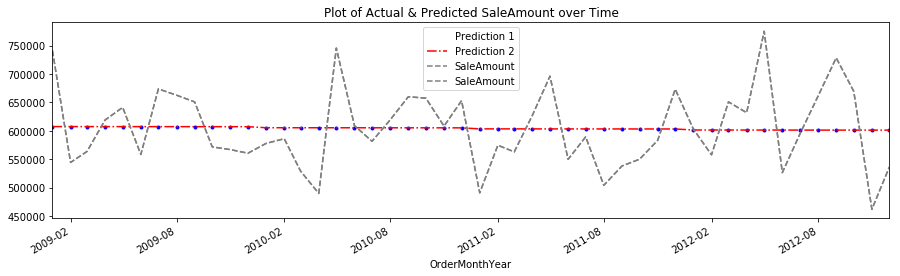

In [158]:
fig = plt.figure(figsize=(15,4))
ax = plt.axes()
# plt.ylim(605150,605300)
plt.title('Plot of Actual & Predicted SaleAmount over Time')
table_pd.plot(x='OrderMonthYear',y='Prediction1', color='blue', style='.',label='Prediction 1', ax=ax)
table_pd.plot(x='OrderMonthYear',y='Prediction2', color='red',style='-.', label='Prediction 2', ax=ax)
table_pd.plot(x='OrderMonthYear', y='SaleAmount', color='gray', style='--', ax=ax)
plt.show()

### Setting up Spark

Download Spark from https://spark.apache.org/ <br>
Download Java SDK from http://www.oracle.com/technetwork/java/javase/downloads/jdk8-downloads-2133151.html

Setting up the executable file from downloaded Spark

For Mac:

ls <br>
mkdir spark <br>
#copy recursively <br>
cp -r Downloads/Spark-1.6.3-bin-hadoop2.6/* spark/ <br>
ls <br>
cd spark

To run spark, type: <br>
./bin/pyspark

### Connecting to Jupyter notebook

For Mac:

1) Set path for Spark and adjust to the correct path to Spark <br>
echo “export PATH=$PATH:/[#path_to_downloaded_spark]/spark-1.6.0/bin” >> .profile <br>

2) Setting up PySpark driver <br>
echo “export PYSPARK_DRIVER_PYTHON=ipython” >> .profile <br>

3) Specifies PySpark options <br>
echo “export PYSPARK_DRIVER_PYTHON_OPTS=‘notebook’ pyspark” >> .profile <br>

source .profile <br>
mkdir notebooks <br>
cd notebooks/ <br>
pyspark <br>

For Windows <br>
1) Puts Spark in a path variable so you can execute commandlets from that directory.  Adjust to your own directory. <br>
$env:Path += “;C:\Users\bsullins\spark\bin\” <br>

2) Set vars for PySpark <br>
$env:PYSPARK_DRIVER_PYTHON=“ipython” <br>

3) Specifies PySpark options <br>
$env:PYSPARK_DRIVER_PYTHON_OPTS=“notebook” <br>

Enter in the following commands instead of source .profile <br>
cd ../ <br>
cd .\notebooks\ <br>
pyspark <br>

